# Project - Anomaly Detection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env
import wrangle as w
import explore as e

In [2]:
# Bringing in the combined logs and cohorts data
codeup_df = w.get_codeup_data()
codeup_df.sample(10)

,date,time,path,user_id,cohort_id,ip,cohort_name,program_id,start_date,end_date,updated_at
765463,2021-02-10,09:25:57,java-ii/object-oriented-programming,522,132.0,99.117.73.127,Kalypso,2,2020-11-02,2021-05-04,2020-11-02 20:43:58
737034,2021-01-15,14:34:47,python/imports,683,59.0,173.174.165.12,Darden,3,2020-07-13,2021-01-12,2020-07-13 18:32:19
11018,2018-02-20,09:02:11,jquery,3,22.0,97.105.19.61,Teddy,2,2018-01-08,2018-05-17,2018-01-08 13:59:10
105884,2018-08-20,11:12:14,java-iii/jsp-and-jstl,195,24.0,97.105.19.58,Voyageurs,2,2018-05-29,2018-10-11,2018-05-25 22:25:57
311929,2019-08-30,15:32:32,appendix/cli/5-creating-files-and-directories,471,34.0,97.105.19.58,Bayes,3,2019-08-19,2020-01-30,2019-08-20 14:38:55
738944,2021-01-19,09:19:09,mysql/group-by,767,62.0,75.1.83.45,Jupiter,2,2020-09-21,2021-03-30,2020-09-21 18:06:27
701760,2020-12-03,18:02:31,html-css/elements,796,132.0,136.50.67.16,Kalypso,2,2020-11-02,2021-05-04,2020-11-02 20:43:58
215017,2019-03-26,09:31:18,mysql/functions,307,27.0,97.105.19.58,Yosemite,2,2018-11-05,2019-04-03,2018-11-05 15:26:37
379521,2019-12-02,10:49:32,javascript-i/introduction/working-with-data-types-operators-and-variables,518,52.0,97.105.19.58,Europa,2,2019-11-04,2020-04-17,2019-11-04 18:27:07
590411,2020-07-29,14:01:17,spring/fundamentals/security,644,57.0,66.25.163.122,Ganymede,2,2020-03-23,2020-08-20,2020-03-23 17:52:16


In [3]:
# finding things out about the data
codeup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         847330 non-null  object 
 1   time         847330 non-null  object 
 2   path         847329 non-null  object 
 3   user_id      847330 non-null  int64  
 4   cohort_id    847330 non-null  float64
 5   ip           847330 non-null  object 
 6   cohort_name  847330 non-null  object 
 7   program_id   847330 non-null  int64  
 8   start_date   847330 non-null  object 
 9   end_date     847330 non-null  object 
 10  updated_at   847330 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 77.6+ MB


In [4]:
# checking the numeric side of the data
codeup_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,847330.0,456.707344,250.734201,1.0,263.0,476.0,648.0,981.0
cohort_id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
program_id,847330.0,2.086004,0.388231,1.0,2.0,2.0,2.0,4.0


In [5]:
# figuring out how big each program is
codeup_df.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

In [6]:
##### determinig what program id 1 is by viewing a large sample
codeup_df[codeup_df['program_id'] == 1].sample(5)

,date,time,path,user_id,cohort_id,ip,cohort_name,program_id,start_date,end_date,updated_at
84752,2018-07-23,09:24:13,java-i/introduction-to-java,53,14.0,97.105.19.58,Lassen,1,2016-07-18,2016-11-10,2016-07-18 19:06:27
470585,2020-03-31,17:08:34,content/html-css/introduction.html,80,14.0,136.50.29.193,Lassen,1,2016-07-18,2016-11-10,2016-07-18 19:06:27
260837,2019-06-19,08:40:15,html-css/css-i/box-model,53,14.0,67.10.174.56,Lassen,1,2016-07-18,2016-11-10,2016-07-18 19:06:27
262552,2019-06-21,13:32:48,spring/fundamentals/services,53,14.0,97.105.19.58,Lassen,1,2016-07-18,2016-11-10,2016-07-18 19:06:27
86897,2018-07-25,09:46:09,slides/syntax_types_and_variables,53,14.0,97.105.19.58,Lassen,1,2016-07-18,2016-11-10,2016-07-18 19:06:27


In [7]:
##### determinig what program id 2 is by viewing a large sample
codeup_df[codeup_df['program_id'] == 2].sample(5)

,date,time,path,user_id,cohort_id,ip,cohort_name,program_id,start_date,end_date,updated_at
406797,2020-01-21,08:44:46,html-css/css-i/flexbox/flexbox-fundamentals,120,53.0,97.105.19.58,Fortuna,2,2020-01-13,2020-06-23,2020-01-13 21:17:08
207860,2019-03-13,11:51:35,javascript-ii,325,29.0,97.105.19.58,Zion,2,2019-01-22,2019-06-04,2019-01-20 23:18:57
106105,2018-08-20,12:59:20,appendix/git/branching,233,25.0,97.105.19.58,Wrangell,2,2018-07-23,2018-11-29,2018-07-23 15:02:25
314168,2019-09-03,15:24:07,javascript-ii/npm,449,33.0,97.105.19.58,Ceres,2,2019-07-15,2019-12-11,2019-07-15 16:57:21
151610,2018-11-13,13:06:46,java-i/introduction-to-java,187,24.0,4.16.216.161,Voyageurs,2,2018-05-29,2018-10-11,2018-05-25 22:25:57


>I know program id 3 is data science

In [8]:
##### this is a small program id group with only 1 user
codeup_df[codeup_df['ip'] == 4]

,date,time,path,user_id,cohort_id,ip,cohort_name,program_id,start_date,end_date,updated_at


In [9]:
codeup_df = w.prep_codeup(codeup_df)
codeup_df.head(3)

,time,path,user,cohort_id,ip,cohort,program_id,start_date,end_date,updated_at,program_name
date,,,,,,,,,,,
2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,Hampton,1,2015-09-22,2016-02-06,2016-06-14 19:52:26,web dev
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,1,2015-09-22,2016-02-06,2016-06-14 19:52:26,web dev
2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,1,2015-09-22,2016-02-06,2016-06-14 19:52:26,web dev


## Questions to keep in mind
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

## 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [10]:
codeup_df

,time,path,user,cohort_id,ip,cohort,program_id,start_date,end_date,updated_at,program_name
date,,,,,,,,,,,
2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,Hampton,1,2015-09-22,2016-02-06,2016-06-14 19:52:26,web dev
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,1,2015-09-22,2016-02-06,2016-06-14 19:52:26,web dev
2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,1,2015-09-22,2016-02-06,2016-06-14 19:52:26,web dev
2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,2,2018-01-08,2018-05-17,2018-01-08 13:59:10,web dev JAVA
2018-01-26,09:56:41,javascript-i/loops,2,22,97.105.19.61,Teddy,2,2018-01-08,2018-05-17,2018-01-08 13:59:10,web dev JAVA
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28,71.150.217.33,Staff,2,2014-02-04,2014-02-04,2018-12-06 17:04:19,web dev JAVA
2021-04-21,16:42:02,jquery/mapbox-api,64,28,71.150.217.33,Staff,2,2014-02-04,2014-02-04,2018-12-06 17:04:19,web dev JAVA
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28,71.150.217.33,Staff,2,2014-02-04,2014-02-04,2018-12-06 17:04:19,web dev JAVA


In [11]:
codeup_df.ip.value_counts()    

97.105.19.58       257736
97.105.19.61        57655
192.171.117.210      8678
71.150.217.33        6343
76.185.145.231       4347
                    ...  
12.97.187.16            1
173.149.140.36          1
172.58.110.227          1
172.56.6.146            1
107.77.218.49           1
Name: ip, Length: 4965, dtype: int64

In [12]:
avg_ip_counts = codeup_df['ip'].value_counts().mean()
avg_ip_counts

161.42517623363545

In [13]:
# Group by IP address and count the number of accesses
ip_counts = codeup_df['ip'].value_counts()

# Filter for IP addresses with an unusually high number of accesses
suspicious_ips = ip_counts[ip_counts > (avg_ip_counts * 20)]  # anything over 20 times the average might be suspecious

suspicious_ips

97.105.19.58       257736
97.105.19.61        57655
192.171.117.210      8678
71.150.217.33        6343
76.185.145.231       4347
67.11.50.23          4164
12.106.208.194       4155
70.121.183.95        3813
70.112.179.142       3783
172.124.67.93        3453
Name: ip, dtype: int64

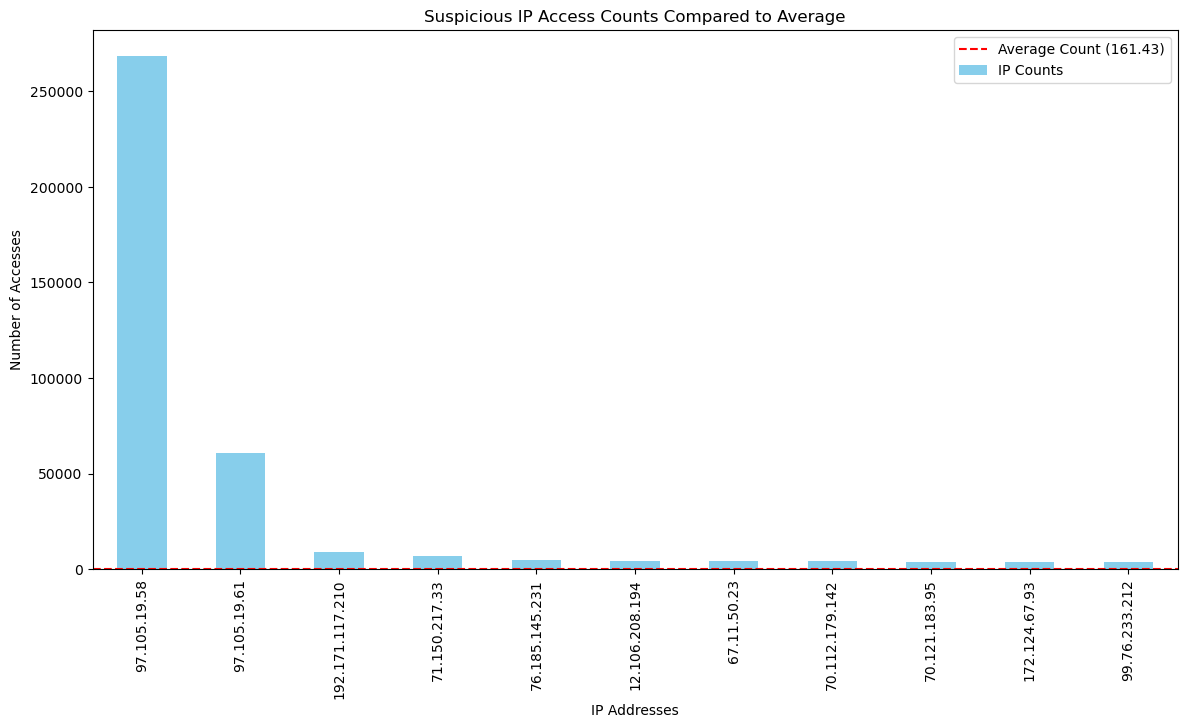

In [14]:
# Example data from the user's output
ip_counts_data = {
    '97.105.19.58': 268648,
    '97.105.19.61': 60530,
    '192.171.117.210': 9124,
    '71.150.217.33': 6791,
    '76.185.145.231': 4754,
    '12.106.208.194': 4343,
    '67.11.50.23': 4181,
    '70.112.179.142': 4117,
    '70.121.183.95': 3843,
    '172.124.67.93': 3511,
    '99.76.233.212': 3491
}

# Convert to pandas Series
suspicious_ips = pd.Series(ip_counts_data)

# Create a bar chart
plt.figure(figsize=(14, 7))
suspicious_ips.plot(kind='bar', color='skyblue', label='IP Counts')

# Plot a horizontal line for the average count
plt.axhline(y=avg_ip_counts, color='r', linestyle='--', label=f'Average Count ({avg_ip_counts:.2f})')

# Annotations and labels
plt.title('Suspicious IP Access Counts Compared to Average')
plt.xlabel('IP Addresses')
plt.ylabel('Number of Accesses')
plt.legend()

# Display the plot
plt.show()


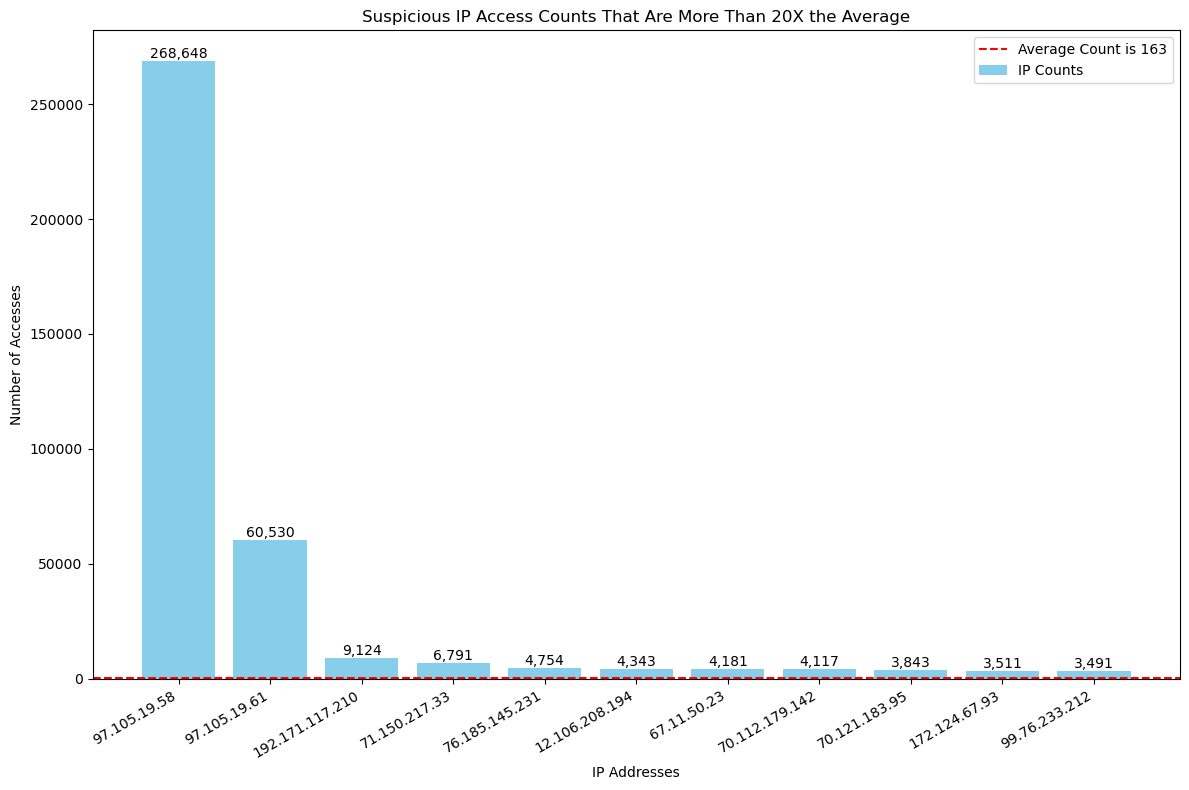

In [39]:
# Sample data for demonstration purposes. Replace this with your actual data.
ip_counts_data = {
    '97.105.19.58': 268648,
    '97.105.19.61': 60530,
    '192.171.117.210': 9124,
    '71.150.217.33': 6791,
    '76.185.145.231': 4754,
    '12.106.208.194': 4343,
    '67.11.50.23': 4181,
    '70.112.179.142': 4117,
    '70.121.183.95': 3843,
    '172.124.67.93': 3511,
    '99.76.233.212': 3491
}

# Convert to pandas Series
suspicious_ips = pd.Series(ip_counts_data)

# Calculate the average count for annotation
avg_ip_counts = round(codeup_df['ip'].value_counts().mean(),0).astype(int)

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(suspicious_ips.index.astype(str), suspicious_ips.values, color='skyblue', label='IP Counts')

# Plot a horizontal line for the average count
plt.axhline(y=avg_ip_counts, color='r', linestyle='--', label=f'Average Count is 163')

# Annotate each bar with its count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom')

# Add title and labels
plt.title('Suspicious IP Access Counts That Are More Than 20X the Average')
plt.xlabel('IP Addresses')
plt.ylabel('Number of Accesses')
plt.xticks(rotation=30, ha='right')  # Rotate the x-axis labels for better readability
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [16]:
# calls out the average 
avg_ip_date_paths = codeup_df.groupby(['ip', 'date'])['path'].nunique().mean()
avg_ip_date_paths

6.80573691743623

In [17]:
# Group by IP and date, then count unique paths
ip_date_paths = codeup_df.groupby(['ip', 'date'])['path'].nunique()

# Filter for IPs with a high number of unique paths for any given date
# Adjust the threshold as needed
potential_scraping = ip_date_paths[ip_date_paths > (avg_ip_date_paths * 20)]  # 
potential_scraping

ip               date      
172.124.70.146   2019-12-19    188
173.173.115.201  2020-11-04    140
173.173.121.126  2018-12-19    193
204.44.112.76    2019-03-03    169
97.105.19.58     2018-08-14    145
                 2019-01-29    137
                 2019-06-11    154
                 2019-07-08    200
                 2019-07-09    168
                 2019-07-25    216
                 2019-08-12    140
                 2019-08-28    170
                 2019-09-03    147
                 2019-09-09    141
                 2019-09-19    139
                 2019-09-26    137
                 2019-10-07    147
                 2019-10-08    161
                 2019-10-11    148
                 2019-10-15    144
                 2019-10-29    144
                 2019-11-01    143
                 2019-11-04    147
                 2019-11-07    145
                 2019-11-21    142
                 2019-11-26    142
                 2019-12-02    149
                 2019-12-10

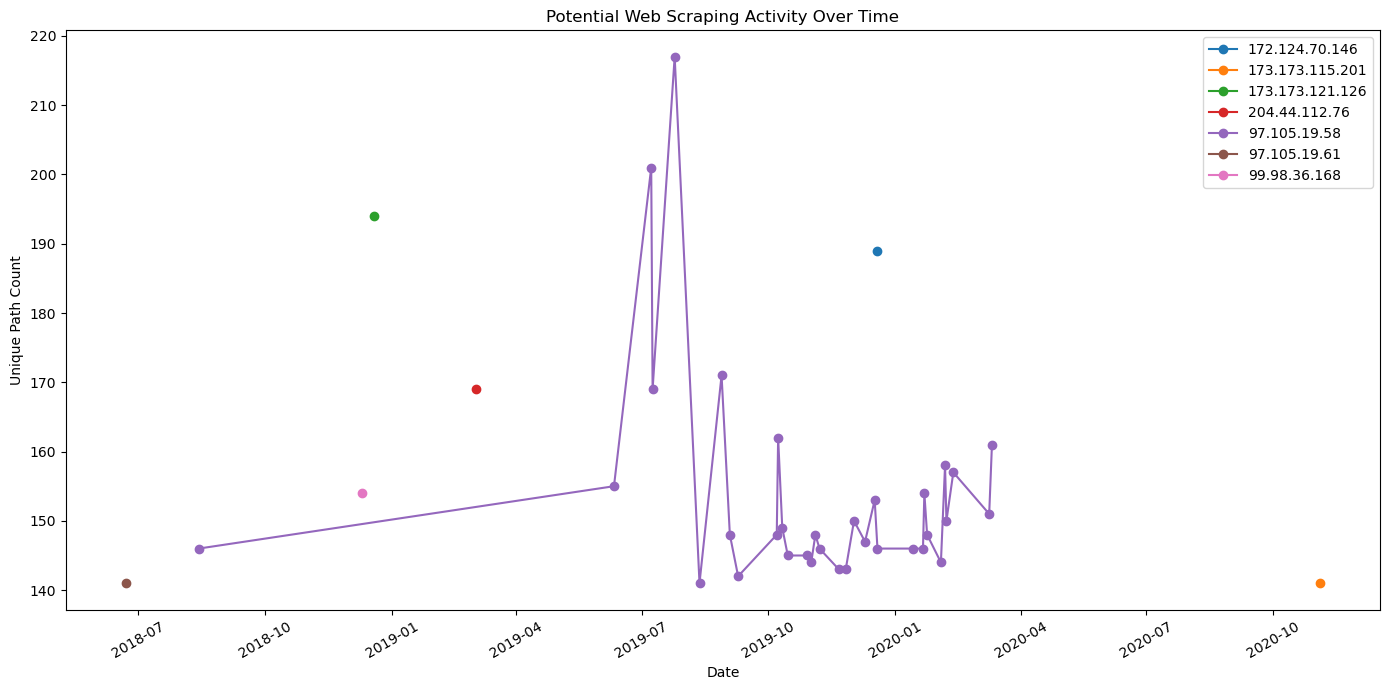

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure to replace 'sample_data' with your actual data
sample_data = {
    ('172.124.70.146', '2019-12-19'): 189,
    ('173.173.115.201', '2020-11-04'): 141,
    ('173.173.121.126', '2018-12-19'): 194,
    ('204.44.112.76', '2019-03-03'): 169,
    ('97.105.19.58', '2018-08-14'): 146,
    ('97.105.19.58', '2019-06-11'): 155,
    ('97.105.19.58', '2019-07-08'): 201,
    ('97.105.19.58', '2019-07-09'): 169,
    ('97.105.19.58', '2019-07-25'): 217,
    ('97.105.19.58', '2019-08-12'): 141,
    ('97.105.19.58', '2019-08-28'): 171,
    ('97.105.19.58', '2019-09-03'): 148,
    ('97.105.19.58', '2019-09-09'): 142,
    ('97.105.19.58', '2019-10-07'): 148,
    ('97.105.19.58', '2019-10-08'): 162,
    ('97.105.19.58', '2019-10-11'): 149,
    ('97.105.19.58', '2019-10-15'): 145,
    ('97.105.19.58', '2019-10-29'): 145,
    ('97.105.19.58', '2019-11-01'): 144,
    ('97.105.19.58', '2019-11-04'): 148,
    ('97.105.19.58', '2019-11-07'): 146,
    ('97.105.19.58', '2019-11-21'): 143,
    ('97.105.19.58', '2019-11-26'): 143,
    ('97.105.19.58', '2019-12-02'): 150,
    ('97.105.19.58', '2019-12-10'): 147,
    ('97.105.19.58', '2019-12-17'): 153,
    ('97.105.19.58', '2019-12-19'): 146,
    ('97.105.19.58', '2020-01-14'): 146,
    ('97.105.19.58', '2020-01-21'): 146,
    ('97.105.19.58', '2020-01-22'): 154,
    ('97.105.19.58', '2020-01-24'): 148,
    ('97.105.19.58', '2020-02-03'): 144,
    ('97.105.19.58', '2020-02-06'): 158,
    ('97.105.19.58', '2020-02-07'): 150,
    ('97.105.19.58', '2020-02-12'): 157,
    ('97.105.19.58', '2020-03-09'): 151,
    ('97.105.19.58', '2020-03-11'): 161,
    ('97.105.19.61', '2018-06-22'): 141,
    ('99.98.36.168', '2018-12-10'): 154   
}

# Convert the dictionary to a pandas Series with a MultiIndex
potential_scraping = pd.Series(sample_data)

# Reset the index of the series to turn it into a DataFrame
df_potential_scraping = potential_scraping.reset_index()
df_potential_scraping.columns = ['ip', 'date', 'unique_path_count']

# Convert 'date' to datetime for plotting
df_potential_scraping['date'] = pd.to_datetime(df_potential_scraping['date'])

# Plot each IP's unique path counts over time
plt.figure(figsize=(14, 7))
for ip in df_potential_scraping['ip'].unique():
    ip_data = df_potential_scraping[df_potential_scraping['ip'] == ip]
    plt.plot(ip_data['date'], ip_data['unique_path_count'], marker='o', label=ip)

plt.xlabel('Date')
plt.ylabel('Unique Path Count')
plt.title('Potential Web Scraping Activity Over Time')
plt.legend()
plt.xticks(rotation=30)  # Rotate the dates for better readability
plt.tight_layout()  # Adjust the layout
plt.show()


##### List of suspicious IP addresses
suspicious_ips = [
    '172.124.70.146',
    '173.173.115.201',
    '173.173.121.126',
    '204.44.112.76',
    '97.105.19.58',
    '97.105.19.61',
    '99.98.36.168'
]

##### Filter the DataFrame for rows where the 'ip' column is in the list of suspicious IPs
users_from_suspicious_ips = codeup_df[codeup_df['ip'].isin(suspicious_ips)]

##### Now, let's check the unique users associated with these IPs
unique_users = users_from_suspicious_ips['user'].unique()

##### Output the unique users
unique_users

# 5. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [19]:
# Filter for activity after the cohort's end date
post_grad_activity = codeup_df[codeup_df.index > codeup_df['end_date']]

# Check for high number of accesses from a single IP which could indicate web scraping
ip_access_counts = codeup_df['ip'].value_counts()
suspicious_ips = ip_access_counts[ip_access_counts > (avg_ip_date_paths)] 

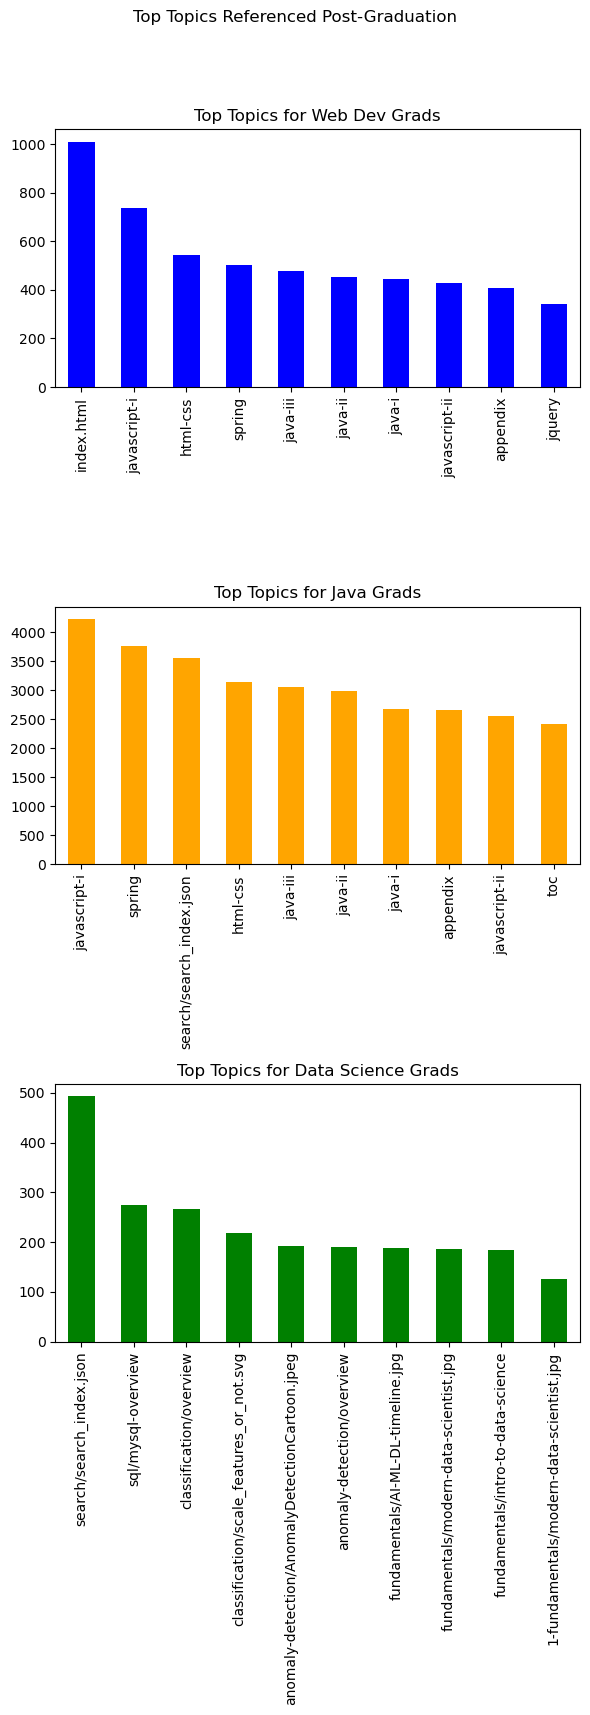

In [36]:
# Filter for activity after the cohort's end date
post_grad_activity = codeup_df[codeup_df.index > codeup_df['end_date']]

# Filter for post-grad activity for each program
web_dev_post_grad = post_grad_activity[post_grad_activity['program_name'] == 'web dev']
java_post_grad = post_grad_activity[post_grad_activity['program_name'] == 'web dev JAVA']
ds_post_grad = post_grad_activity[post_grad_activity['program_name'] == 'data sci']

# Get the top 10 most accessed paths for each program
web_dev_topics = web_dev_post_grad['path'].value_counts().head(10)
java_topics = java_post_grad['path'].value_counts().head(10)
ds_topics = ds_post_grad['path'].value_counts().head(10)
print(f'web_dev_topics
print(f'java_topics = 
print(f'ds_topics = ds


# Plot all three top topics on one graph for comparison
plt.figure(figsize=(6,18 ))

# Plot for Web Dev Grads
plt.subplot(3, 1, 1)
web_dev_topics.plot(kind='bar', color='blue', title='Top Topics for Web Dev Grads')
plt.xticks(rotation=90)

# Plot for Java Grads
plt.subplot(3, 1, 2)
java_topics.plot(kind='bar', color='orange', title='Top Topics for Java Grads')
plt.xticks(rotation=90)

# Plot for Data Science Grads
plt.subplot(3, 1, 3)
ds_topics.plot(kind='bar', color='green', title='Top Topics for Data Science Grads')
plt.xticks(rotation=90)

plt.suptitle('Top Topics Referenced Post-Graduation')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to fit the title
plt.show()

# Q3

In [ ]:
#
least_accessed_paths = codeup_df['path'].value_counts()

# Filter paths that have been accessed less than 2 times
least_accessed_paths = least_accessed_paths[least_accessed_paths < 2]
least_accessed_paths.to_markdown()

In [ ]:
codeup_df.head()

# Q4

In [ ]:
# Resample to get daily counts and plot
daily_page_views = codeup_df['path'].resample('D').count()
daily_page_views.plot(figsize=(15, 7), title='Daily Page Views')

In [ ]:
# Filter the DataFrame for 'program_id' == 1
web_dev_df = codeup_df[codeup_df['program_id'] == 1]

# Resample to get daily counts for 'program_id' == 1
daily_page_views_web_dev = web_dev_df['path'].resample('D').count()

# Plot the daily page views for 'program_id' == 1
daily_page_views_web_dev.plot(figsize=(15, 7), title='Daily Page Views for Dev Web')

# Show the plot
plt.show()

In [ ]:
# Filter the DataFrame for 'program_id' == 1
java_df = codeup_df[codeup_df['program_id'] == 2]

# Resample to get daily counts for 'program_id' == 2
daily_page_views_java = java_df['path'].resample('D').count()

# Plot the daily page views for 'program_id' == 2
daily_page_views_java.plot(figsize=(15, 7), title='Daily Page Views for Java')

# Show the plot
plt.show()

In [ ]:
# Filter the DataFrame for 'program_id' == 1
ds_df = codeup_df[codeup_df['program_id'] == 3]

# Resample to get daily counts for 'program_id' == 3
daily_page_views_ds = ds_df['path'].resample('D').count()

# Plot the daily page views for 'program_id' == 3
daily_page_views_ds.plot(figsize=(15, 7), title='Daily Page Views for Data Science')

# Show the plot
plt.show()

In [ ]:
# plotting all three at once to see if there is a major difference

# Filter the DataFrame for 'program_id' == 1
web_dev_df = codeup_df[codeup_df['program_id'] == 1]
# Resample to get daily counts for 'program_id' == 1
daily_page_views_web_dev = web_dev_df['path'].resample('D').count()

# Filter the DataFrame for 'program_id' == 2
java_df = codeup_df[codeup_df['program_id'] == 2]
# Resample to get daily counts for 'program_id' == 2
daily_page_views_java = java_df['path'].resample('D').count()

# Filter the DataFrame for 'program_id' == 3
ds_df = codeup_df[codeup_df['program_id'] == 3]
# Resample to get daily counts for 'program_id' == 3
daily_page_views_ds = ds_df['path'].resample('D').count()

# Plot all three daily page views on one graph
plt.figure(figsize=(15, 7))
daily_page_views_web_dev.plot(label='Web Dev', legend=True)
daily_page_views_java.plot(label='Java', legend=True)
daily_page_views_ds.plot(label='Data Science', legend=True)
plt.title('Daily Page Views for Each Program')
plt.xlabel('Date')
plt.ylabel('Number of Page Views')
plt.legend()
plt.show()
